TITANIC GROUP ASSIGNMENT (GROUP 11)

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Loading dataset
titanic_df = pd.read_csv('titanic3.csv')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [30]:
titanic_df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


### **1**.Business Understanding

### 2.Objective:
Analyze survival factors among Titanic passengers using Age, socio-economic, and other available variables.

### 3.Questions:
-What factors significantly influenced survival of the passengers?

-How did socio-economic status, as approximated by passenger class, affect survival?

### 4.Data Understanding

In [31]:
# Summary of dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [32]:
# Basic statistics
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [33]:
#counting the data items
titanic_df['name'].value_counts()

,count
name,
"Connolly, Miss. Kate",2
"Kelly, Mr. James",2
"Allen, Miss. Elisabeth Walton",1
"Ilmakangas, Miss. Ida Livija",1
"Ilieff, Mr. Ylio",1
...,...
"Hart, Miss. Eva Miriam",1
"Harris, Mr. Walter",1
"Harris, Mr. George",1


In [34]:
#checking missing values
titanic_df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [35]:
#dropping column with missing values (dropping single column)
titanic_df = titanic_df.drop('body', axis=1)

In [36]:
titanic_df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [37]:
#dropping columns with missing values (dropping multiple columns)
titanic_df = titanic_df.drop(['cabin', 'boat'], axis=1)

In [38]:
titanic_df = titanic_df.drop('home.dest', axis=1)


In [14]:
titanic_df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
embarked,2


In [40]:
# handling missing values using median
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median())

In [42]:
# handling missing values using median
titanic_df['fare'] = titanic_df['fare'].fillna(titanic_df['fare'].median())

In [43]:
titanic_df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
embarked,2


In [ ]:
#Handling missing values that are objects
#Not dropping embarking as this may affect the survival rate


### 5.Data Exploration Visualization

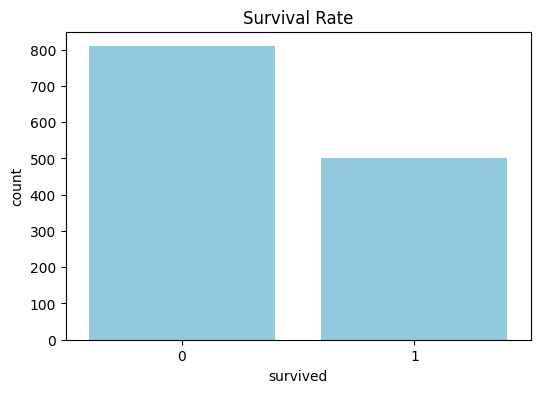

In [58]:
# Survival Rate
# Bar plot for survival
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_df, x='survived', color='skyblue')
plt.title('Survival Rate')
plt.show()

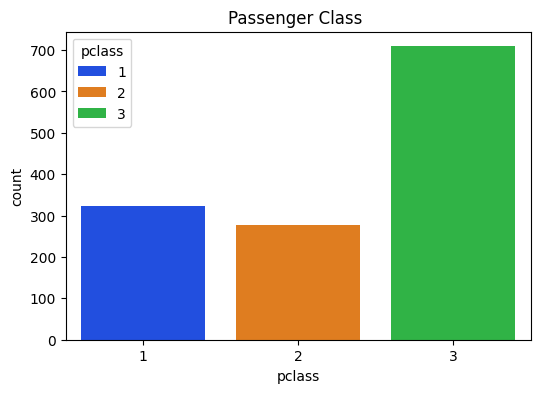

In [59]:
# Bar plot for passenger class
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_df, x='pclass', hue='pclass', palette='bright')
plt.title('Passenger Class ')
plt.show()


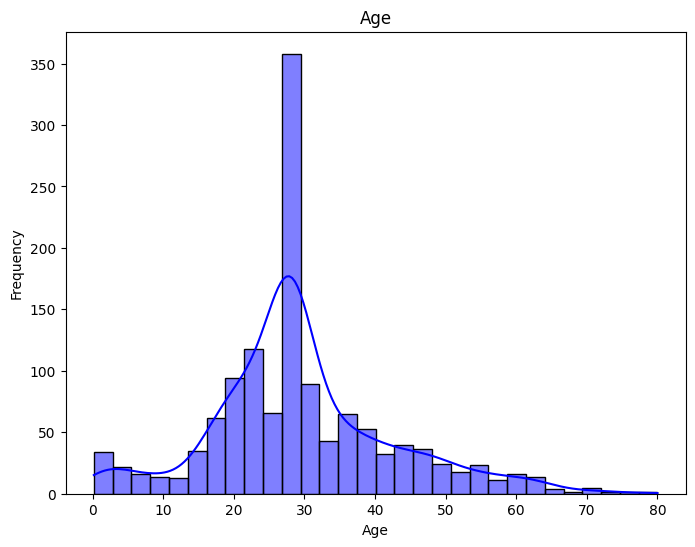

In [60]:
# Histogram for age
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['age'], bins=30, kde=True, color='blue')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

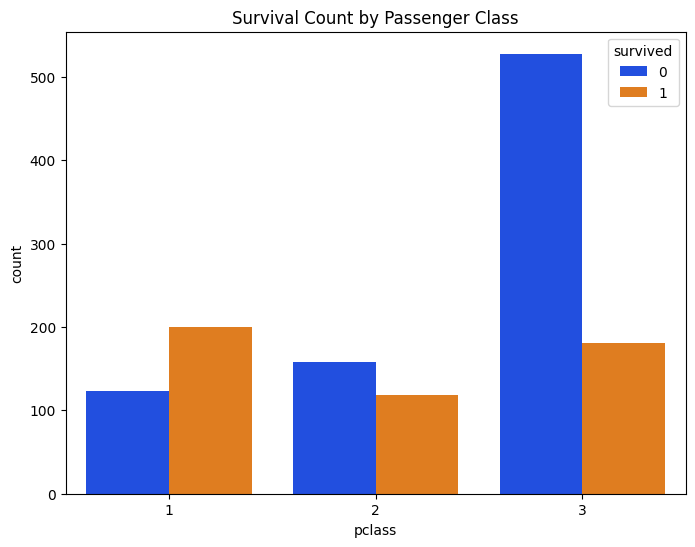

In [52]:
# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='pclass', hue='survived', palette='bright')
plt.title('Survival Count by Passenger Class')
plt.show()


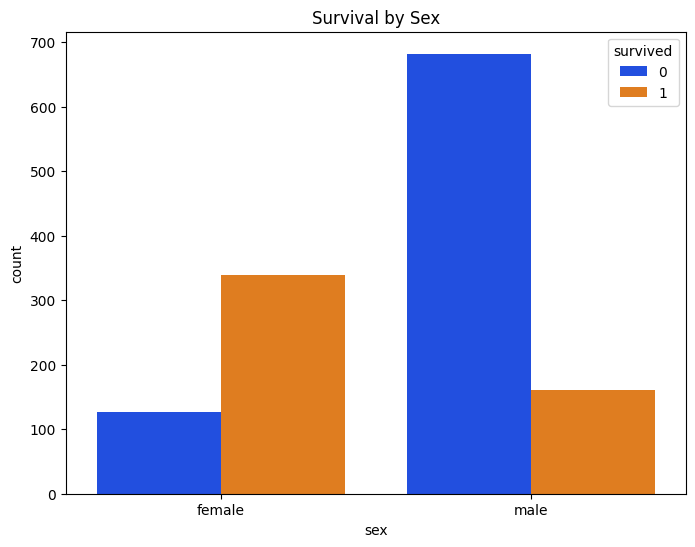

In [53]:
# Survival by sex
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='sex', hue='survived', palette='bright')
plt.title('Survival by Sex')
plt.show()

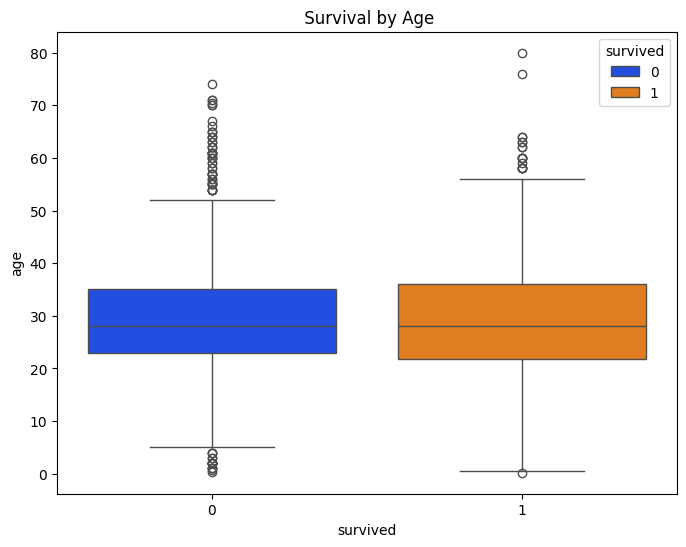

In [63]:
# Boxplot of survival by age
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic_df, x='survived', y='age',hue='survived', palette='bright')
plt.title(' Survival by Age')
plt.show()


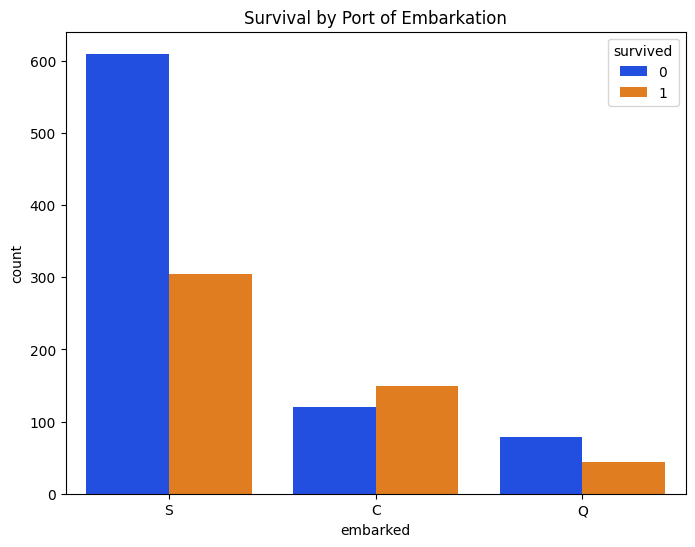

In [64]:
# Bar plot for survival by port of embarkation
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_df, x='embarked', hue='survived', palette='bright')
plt.title('Survival by Port of Embarkation')
plt.show()

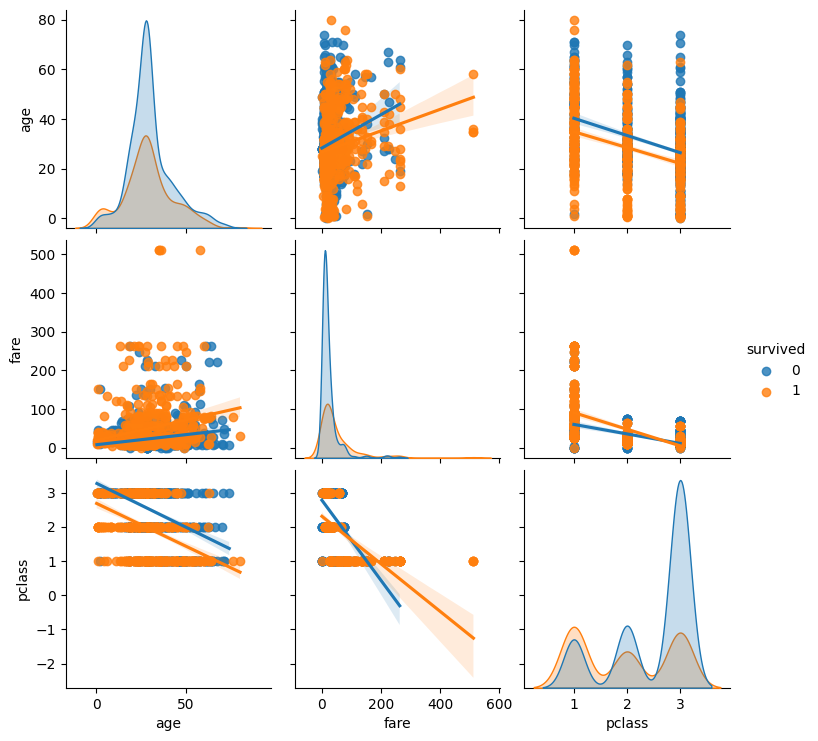

In [26]:
#pairplots survival
sns.pairplot(titanic_df[['age', 'fare', 'pclass', 'survived']], hue='survived', kind='reg')
plt.show()